# 데이터 분석 - 영화

## 1. 문제 정의하기

1. **흥행 TOP 10 영화 살펴보기**

   * 속성: 영화 이름, 제작사, 장르, 개봉연도, 예산(budget), 수익(revenue)
   * 목표: 흥행 수익(revenue) 기준으로 가장 성공한 영화 10개를 확인하고, 어떤 제작사가 많이 참여했는지 알아본다.

2. **흥행 성공과 관련 깊은 속성 찾기**

   * 속성 후보: `budget`, `runtime`, `genres`, `vote_average`, `popularity`
   * 목표: 흥행 수익(revenue)과 가장 관련 깊은 변수를 찾는다 (상관분석, 회귀분석 활용).

3. **연도별 영화 개수와 흥행 추세**

   * 속성: `release_date`, `revenue`, `vote_average`
   * 목표: 연도별 제작된 영화 수가 어떻게 변화했는지, 그리고 평균 흥행 수익과 평점이 어떤 추세를 보이는지 확인한다.


## 2. 데이터셋 불러오기

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import ast

In [ ]:
# 파일 업로드하기
from google.colab import files
uploaded = files.upload()

In [4]:
# 파일을 변수로 불러오고 상위 5개의 데이터 출력하기
movieData = pd.read_csv('tmdb_5000_movies.csv')
movieData.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## 3. 데이터 탐색 및 시각화

In [7]:
# 데이터의 크기 파악하기
movieData.shape

(4803, 9)

In [5]:
# 데이터의 칼럼 정보 파악하기
movieData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### 다음 주요 속성만 추출하기
- original_title
- production_companies
- genres
- release_date
- budget
- revenue
- vote_average
- popularity
- runtime

In [6]:
# 주요 속성 추출하기
cols = [
    "original_title",
    "production_companies",
    "genres",
    "release_date",
    "budget",
    "revenue",
    "vote_average",
    "popularity",
    "runtime"
]

movieData = movieData[cols]
movieData.head()

,original_title,production_companies,genres,release_date,budget,revenue,vote_average,popularity,runtime
0,Avatar,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2009-12-10,237000000,2787965087,7.2,150.437577,162.0
1,Pirates of the Caribbean: At World's End,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",2007-05-19,300000000,961000000,6.9,139.082615,169.0
2,Spectre,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2015-10-26,245000000,880674609,6.3,107.376788,148.0
3,The Dark Knight Rises,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",2012-07-16,250000000,1084939099,7.6,112.312950,165.0
4,John Carter,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2012-03-07,260000000,284139100,6.1,43.926995,132.0


### 탐색 정보 1 - 흥행 TOP 10 영화 살펴보기

In [8]:
# 흥행 수익(revenue)을 기준으로 내림차순 정렬하기
movieData = movieData.sort_values(by = 'revenue', ascending= False)
movieData.head()

,original_title,production_companies,genres,release_date,budget,revenue,vote_average,popularity,runtime
0,Avatar,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2009-12-10,237000000,2787965087,7.2,150.437577,162.0
25,Titanic,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",1997-11-18,200000000,1845034188,7.5,100.025899,194.0
16,The Avengers,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",2012-04-25,220000000,1519557910,7.4,144.448633,143.0
28,Jurassic World,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2015-06-09,150000000,1513528810,6.5,418.708552,124.0
44,Furious 7,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""id"": 28, ""name"": ""Action""}]",2015-04-01,190000000,1506249360,7.3,102.322217,137.0


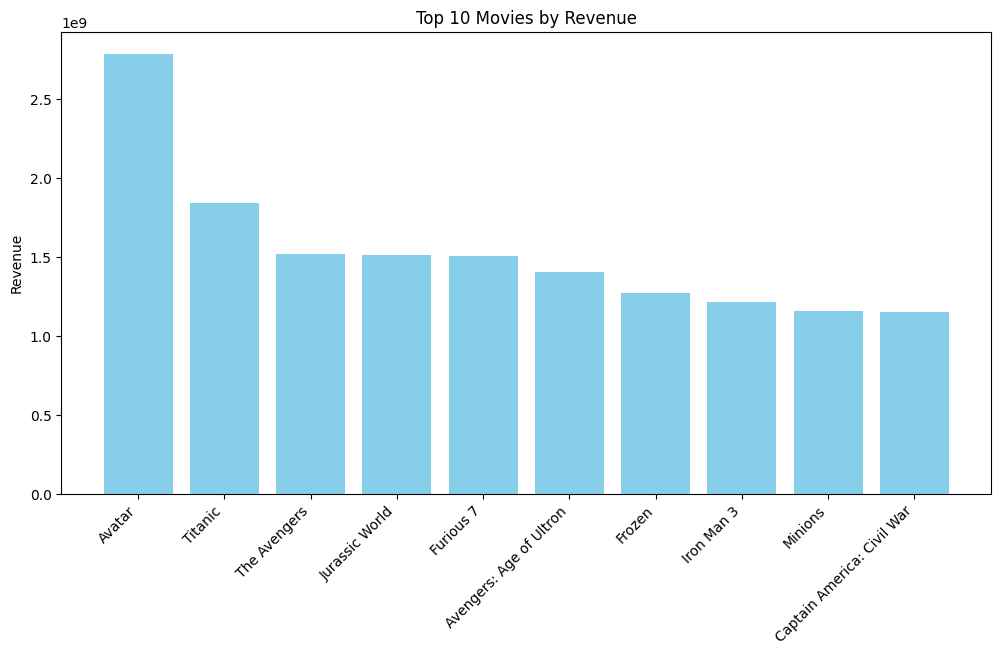

In [11]:
# 흥행 수익 기준 top10 영화 데이터를 막대그래프로 표현하기
top10 = movieData.head(10)
plt.figure(figsize=(12,6))
plt.bar(top10['original_title'], top10['revenue'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Revenue')
plt.title('Top 10 Movies by Revenue')
plt.show()

### 탐색정보 2 - 흥행 성공과 관련 깊은 속성 찾기

In [17]:
# 속성 중 숫자형 데이터만을 다루는 속성만 추출
movie_numeric = movieData.select_dtypes(include=['number'])
# 각 속성 간의 상관관계를 구함.
movieCorr = movie_numeric.corr()
# 'revenue' 속성만 추출하기
movieCorr['revenue']

budget          0.730823
revenue         1.000000
vote_average    0.197150
popularity      0.644724
runtime         0.251093
Name: revenue, dtype: float64

/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_90073/3936391388.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, movieCorr['revenue'][i] + 0.05,'%.2f'%movieCorr['revenue'][i], va = 'center', ha = 'center')


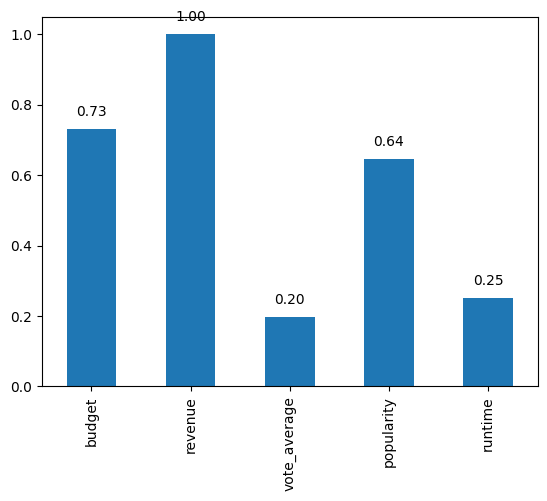

In [ ]:
# 막대그래프로 시각화하기
movieCorr['revenue'].plot.bar()
for i in range(len(movieCorr['revenue'])) :
    plt.text(i, movieCorr['revenue'][i] + 0.05,'%.2f'%movieCorr['revenue'][i], va = 'center', ha = 'center')

### 탐색 정보 3 - 연도별 영화 개수와 흥행 추세

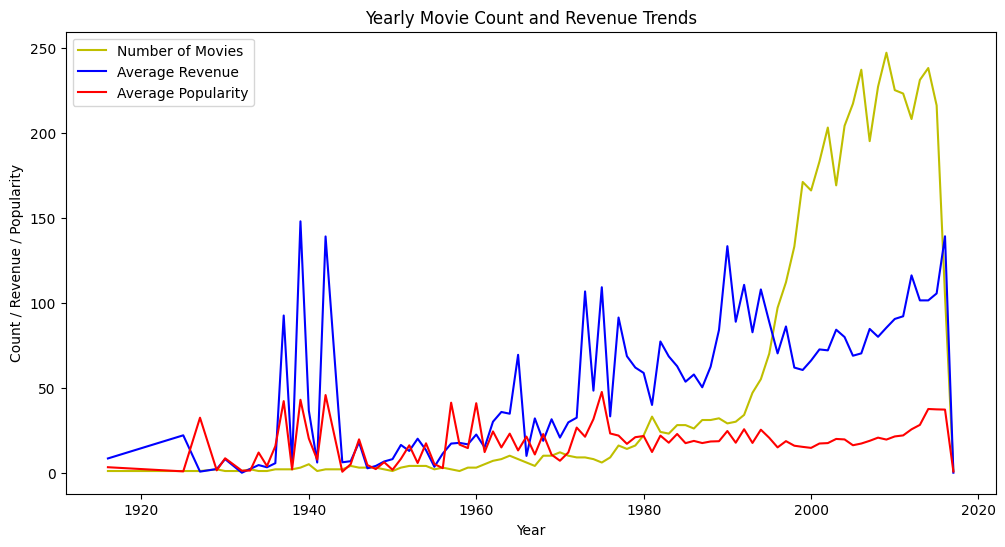

In [19]:
# release_date의 데이터 타입을 'datetime'으로 번경
movieData['release_date'] = pd.to_datetime(movieData['release_date'], errors= 'coerce')

# 년도 추출
movieData['release_year'] = movieData['release_date'].dt.year

# 년도별 영화(original_title) 개수와 평균 revenue, popularity 계산
yearly_movie = movieData.groupby('release_year').agg({
    'original_title' : 'count',
    'revenue' : 'mean',
    'popularity' : 'mean'
})
# revenue 는 숫자 단위가 커서 백만 단위로 나누기
yearly_movie['revenue'] = yearly_movie['revenue'] / 1000000

# 선 그래프 그리기(3개의 선이 그려져야함)
plt.figure(figsize=(12, 6))
plt.plot(yearly_movie.index, yearly_movie['original_title'], label = 'Number of Movies', color = 'y')
plt.plot(yearly_movie.index, yearly_movie['revenue'], label = 'Average Revenue', color = 'b')
plt.plot(yearly_movie.index, yearly_movie['popularity'], label = 'Average Popularity', color = 'r')
plt.xlabel('Year')
plt.ylabel('Count / Revenue / Popularity')
plt.title('Yearly Movie Count and Revenue Trends')
plt.legend()
plt.show()